In [1]:
import sys


from Global_Functions import Functions as F
from Global_Functions import LDV as ldv
from Global_Functions import Plotter as Plotter
from Global_Functions import *
from matplotlib.lines import Line2D

from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches


# Functions

In [2]:
def create_plots_metrics(metric_list,Q,ylabel='',label='',xlabel='',title='',Daylight=False,Distance_Optimal=False,
Imrovenent_over_std_app=False,metric2nd_list=None,legend=False,ax=None,idx=None,color=None,marker=None,transparency=1):
        try:
            df=Plotter.create_df_plotly(metric_list,Q)
        except:
            df=Plotter.create_df_plotly(metric_list.T,Q)

        x=Q
        means=np.array(df.mean())
        upperbound=df.where(df>=means)
        lowerbound=df.where(df<means)
        upper_std=upperbound.std()
        lower_std=lowerbound.std()
        if Daylight:
            df_day=Plotter.create_df_plotly(metric_list,Q,daylight=Daylight)
        plt.title(title)
        if Distance_Optimal:
            plt.title(f'{title} - Distance Optimal')
            if metric2nd_list is not None:
                try:
                    df2nd=Plotter.create_df_plotly(metric2nd_list,Q)
                except:
                    df2nd=Plotter.create_df_plotly(metric2nd_list.T,Q)
                if Daylight:
                    df2nd_day=Plotter.create_df_plotly(metric2nd_list,Q,daylight=Daylight)
                    plt.plot((1-df_day.mean()-(1-df2nd_day.mean()))/(1-df_day.mean()),label='Reduction of distance to optimal Daylight')
    
                if ax:
                    ax[idx].plot((1-df.mean()-(1-df2nd.mean()))/(1-df.mean()),label='Reduction of distance to optimal')
                else:
                    plt.plot((1-df.mean()-(1-df2nd.mean()))/(1-df.mean()),label='Reduction of distance to optimal Ratio')
               
            else:
                plt.plot(1-df.mean(),label=f'{xlabel}')
                if Daylight:
                    plt.plot(1-df_day.mean(),label=f'Daylight {label}')
        elif Imrovenent_over_std_app:
            if metric2nd_list is not None:
                try:
                    df2nd=Plotter.create_df_plotly(metric2nd_list,Q)
                except:
                    df2nd=Plotter.create_df_plotly(metric2nd_list.T,Q)
                
                if Daylight:
                    df2nd_day=Plotter.create_df_plotly(metric2nd_list,Q,daylight=Daylight)
                    plt.plot((df2nd_day.mean()-df_day.mean())/df_day.mean(),label='Improvement over standard approach Daylight')
                
                else:
                    if np.any(ax!=None):
                        Improvement=(df2nd.mean()-df.mean())/df.mean()
                        ax[idx].plot(Improvement,label=label,marker=marker,color=color,alpha=transparency)
                    else:

                        plt.plot((df2nd.mean()-df.mean())/df.mean(),label='Improvement over standard approach')
    
            else:
                plt.plot(1-df.mean(),label=f' {label}')
                if Daylight:
                    plt.plot(1-df_day.mean(),label=f'Daylight {label}')
        else:
            if np.any(ax!=None):
                ax[idx].plot(df.mean(),label=f'{label}',color=color,marker=marker,alpha=transparency)
                ax[idx].fill_between(x, means- lower_std, means + upper_std, color=color, alpha=0.2)
            else:
                plt.plot(df.mean(),label=f' {label}',marker='o')
            if Daylight:
                plt.plot(df_day.mean(),label=f'Daylight {label}',marker='o')
        if ylabel:
            if np.any(ax!=None):
                ax[idx].set_ylabel(ylabel)
            else:

                plt.ylabel(ylabel)
        if xlabel:
            if np.any(ax!=None):
                ax[idx].set_xlabel(xlabel)
            else:
                plt.xlabel(xlabel)
  
        if legend:
            if np.any(ax!=None):
                ax[idx].legend()
            else:
                plt.legend()


        
           

In [3]:
def savefigs_all_formats(Filesave_path,fig_name):
    png_fpath=f'{Filesave_path}/png/'
    if not os.path.exists(png_fpath):
        os.makedirs(png_fpath)
    pdf_fpath=f'{Filesave_path}/pdf/'
    if not os.path.exists(pdf_fpath):
        os.makedirs(pdf_fpath)
    eps_fpath=f'{Filesave_path}/eps/'
    if not os.path.exists(eps_fpath):
        os.makedirs(eps_fpath)
    plt.savefig(f'{png_fpath}/{fig_name}.png',dpi=300,bbox_inches='tight')
    plt.savefig(f'{pdf_fpath}/{fig_name}.pdf',dpi=300,bbox_inches='tight')
    plt.savefig(f'{eps_fpath}/{fig_name}.eps',bbox_inches='tight')

In [4]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


In [5]:
def Plotter_csv_fill_b(benc_pd,us_pd,typess='p',marker='o',y_Range=0.7,vline=True,exp_type='Q',dataset='real'):
    fig,ax= plt.subplots(1,1,figsize=(6.5,5)) ### (6.5,5 ) for paper
    # fig,ax= plt.subplots(1,1,figsize=(8,5)) ### (6.5,5 ) for paper
    marker=None

    #OB_label=r'$\bar{D}_{p}$'.replace('p',typess)
    #SP_label=r'$\bar{D}_{p}^{(P)}$'.replace('p',typess)
    OB_label=''
    SP_label=''

    ax.plot(us_pd.OB, label=OB_label +"kaNSaaS" ,marker=marker,color='#ff7f0e')
    ax.plot(benc_pd.OB, label=OB_label+"CoNEXT" ,marker=marker,color='#1f77b4')
    ax.plot(us_pd.SP, label=SP_label+'Legacy NSaaS' ,marker=marker,color='#2ca02c')
    
    ax.set_ylabel(r'$\bar{D}_{p}$')

    #ax.set_xticks(np.linspace(0,1,11))
    ax.grid(axis='y')
   
    ax.tick_params('x',labelrotation=-60)
    
    #ax.legend(fontsize=20,fancybox=True,framealpha=0.5,bbox_to_anchor=(1.05, 1), loc='upper left')
   

    # Fill between conext and kansaas
    ax.fill_between(benc_pd.index,benc_pd.OB,us_pd.OB,facecolor='grey',alpha=0.3)

    #Write the improvement mean over the fill
    mean=np.mean(us_pd.OB/benc_pd.OB)

    # Get handles and labels
    # handles, labels = ax.get_legend_handles_labels()
    # # Create custom artists
    # custom_lines = [Line2D([0], [0], linestyle='', marker='s', markersize=20, markerfacecolor='grey')]

    # circ1 = mpatches.Patch( facecolor='grey',alpha=0.3,label='Gain over CoNEXT')
    
    #merge handles and custom lines
    # han=handles+[circ1]
    #merge labels and custom labels
    #lab=labels+['Gain over CoNEXT']
    # labe=['kaNSaaS','CoNEXT','Legacy NSaaS','Gain over CoNEXT']

    ## Create legend from custom artist/label lists with the previous legend as a starting point
    # legend=ax.legend(han, labe, bbox_to_anchor=(0.5, 1.22), loc='upper center',frameon=False,ncol=4,handletextpad=0.5)


    # custom_lines = [Line2D([0], [0], linestyle='', marker='s', markersize=20, markerfacecolor='grey')]
    # legend2=plt.legend(custom_lines, ['Gain over CoNEXT'], bbox_to_anchor=(0.115, 1.38), loc='upper center', ncol=3,frameon=False)
    # legend1=ax.legend( bbox_to_anchor=(0.5, 1.22), loc='upper center',frameon=False,ncol=3)
    # plt.gca().add_artist(legend2)    


    # export_legend(legend, 'legend_fin.pdf')
    # export_legend(legend1, 'legend1.pdf')

    # print(f'us_pd.OB = {us_pd.OB}')
    # print(f'benc_pd.OB = {benc_pd.OB}')
    # print(f'us_pd.OB/benc_pd.OB = {us_pd.OB/benc_pd.OB}')
    # print(f'mean = {mean}')
    el = Ellipse((2, 1), 0.5, 0.5)
    # ax.add_patch(el)
    ec='black'
    if exp_type=='Q':
        #ax.set_xlabel(r'$n_{alloc} · c_{OPEX} / M_{s}$')
        ax.set_xlabel(r'Resource allocation cost, $c_{OPEX}$')
        if typess=='p':
            if dataset == 'real':
                #ax.text(0.45,0.6,f'{int(np.round(mean*100)-100)}\%')  ### Real 0.45,0.6
                ax.annotate('',
                            xy=(0.45, 0.7), xycoords='data',
                            xytext=(0.1, 0.2), textcoords='data',
                            arrowprops=dict(facecolor='black', arrowstyle='fancy',fc="0.6", ec=ec,
                            patchB = el,                           
                            ))
                ax.text(0.05,0.05,f'Average gain {int(np.round(mean*100)-100)}\%')  ### Real 0.45,0.6
            elif dataset == 'synthetic':
                 ## Add fancy arrow
                ax.annotate('',
                            xy=(0.5, 0.55), xycoords='data',
                            xytext=(0.1, 0.2), textcoords='data',
                            arrowprops=dict(facecolor='black', arrowstyle='fancy',fc="0.6", ec=ec,
                            patchB = el,                           
                            ))
                ax.text(0.03,0.03,f'Average gain {int(np.round(mean*100)-100)}\%')  ### Synthetic 0.5,0.55
         
        if typess=='r':

            ax.text(0.5,0.55,f'{100- int(np.round(mean*100)-100)}\%')

    elif exp_type=='Tadm':
        ax.set_xlabel(r"RA block interval, $T_{RA}$ [min]")
        if typess=='p':
            if dataset == 'real':
                ## Add fancy arrow
                ax.annotate('',
                            xy=(56, 0.4), xycoords='data',
                            xytext=(60, 0.7), textcoords='data',
                            arrowprops=dict(facecolor='0.8', width= 1, headwidth = 2))
                
                ax.text(45,0.72,f'Average gain {int(np.round(mean*100)-100)}\%') ### Synthetic 56,0.35
            elif dataset == 'synthetic':
                ## Add fancy arrow
                ax.annotate('',
                            xy=(56, 0.27), xycoords='data',
                            xytext=(60, 0.7), textcoords='data',
                            arrowprops=dict(facecolor='black', arrowstyle='fancy',fc="0.6", ec=ec,
                            patchB = el,                           
                            ))
                ax.text(45,0.72,f'Average gain {int(np.round(mean*100)-100)}\%') ### Real 56,0.27
                
           
        ax.set_xticks([0,60,120])
        ax.set_xticklabels([0,60,120])

    elif exp_type=='C_tot':
        ax.set_xlabel(r'Normalized available capacity, $\bar C_{r}^{(l)}$')
        #ax.set_xlabel(r'Normalized available capacity, Capacity / max. Throughput')
        if typess=='p':
            if dataset == 'real':
                #ax.text(1.2,0.45,f'{int(np.round(mean*100)-100)}\%') ### Real 1.2,0.45
                ## Add fancy arrow
                ax.annotate('',
                            xy=(1.1, 0.5), xycoords='data',
                            xytext=(1.2, 0.7), textcoords='data',
                            arrowprops=dict(facecolor='black', arrowstyle='fancy',fc="0.6", ec=ec,
                            patchB = el,                           
                            ))
                ax.text(1.05,0.75,f'Average gain {int(np.round(mean*100)-100)}\%') ### Synthetic 1.1,0.3
            elif dataset == 'synthetic':

                ## Add fancy arrow
                ax.annotate('',
                            xy=(1.1, 0.35), xycoords='data',
                            xytext=(1.2, 0.7), textcoords='data',
                            arrowprops=dict(facecolor='black', arrowstyle='fancy',fc="0.6", ec=ec,
                            patchB = el,                           
                            ))
                ax.text(1.05,0.75,f'Average gain {int(np.round(mean*100)-100)}\%') ### Synthetic 1.1,0.35
            
            arrowprops=dict(arrowstyle="fancy",
                                            connectionstyle="arc3",facecolor='black',fc='0.6'),
    if typess=='r':

            ax.text(0.5,0.55,f'{100- int(np.round(mean*100)-100)}\%')


   
        
    if vline:
        if exp_type=='Q':
            ax.axvline(0.9,linewidth=20,color='grey',alpha=0.2)
        elif exp_type=='C_tot':
            ax.axvline(1,linewidth=20,color='grey',alpha=0.2)
        elif exp_type=='Tadm':
            ax.axvline(30,linewidth=20,color='grey',alpha=0.2)
    
    if exp_type !='COST':
        ax.set_ylim([0,1.05])

    #ax[1].set_yscale('log')
    fig.tight_layout()
    plt.tight_layout()

In [6]:
def select_index_values(data,index):
    data=data[index]
    return data

In [7]:
import datetime
Date=datetime.datetime.now().strftime("%d_%m_%Y")
# Date=date.today().strftime('%d_%m_%Y')
Filesave='data/Results/Figs/FINAL_PAPER/'+Date+'/'
# Date='20_02_2023'

In [8]:
Filesave

'data/Results/Figs/FINAL_PAPER/19_09_2023/'

# CSV Load

## Synthetic Data (with prediction)

### Ctot Analysis

In [16]:
# CTOT ANALYSIS ##
benc_pd_p=pd.read_csv('./data/Results/Figs/FINAL_PAPER/19_09_2023/csv/Ctot_Exp_T_adm_x_y_data_p.csv',index_col=0)
us_pd_p=pd.read_csv('./data/Results/Figs/FINAL_PAPER/19_09_2023/csv/Synthetic_KaNSaaS_Ctot_exp_T_adm_x_y_data_p.csv',index_col=0)



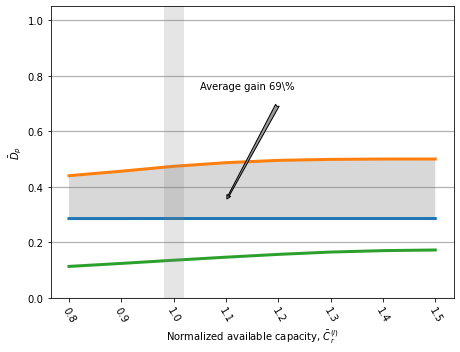

In [17]:

dataset='synthetic'
Plotter_csv_fill_b(benc_pd_p,us_pd_p,typess='p',exp_type='C_tot',dataset=dataset)
#savefigs_all_formats(Filesave,'Synthetic_Ctot_p_benchmark_squared_v2')

### Q analysis

In [18]:
## COPEX ANAlYSIS ##
benc_pd_p=pd.read_csv('./data/Results/Figs/FINAL_PAPER/19_09_2023/csv/Synthetic_coNEXT_noisy_Q_x_y_data_p.csv',index_col=0)
us_pd_p=pd.read_csv('./data/Results/Figs/FINAL_PAPER/19_09_2023/csv/Synthetic_KaNSaaS_noisy_Q_x_y_data_p.csv',index_col=0)


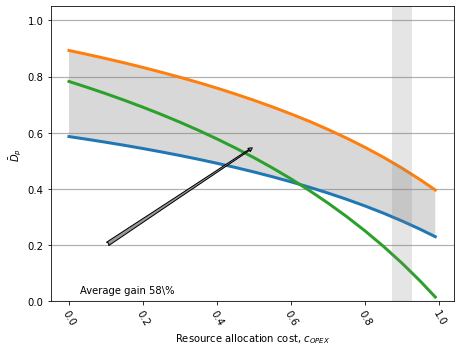

In [19]:
dataset='synthetic'
Plotter_csv_fill_b(benc_pd_p,us_pd_p,typess='p',exp_type='Q',dataset=dataset)
# savefigs_all_formats(Filesave,'Synthetic_Q_p_benchmark_squared_v2')

### T_adm Analysis

In [21]:
benc_pd_p=pd.read_csv('./data/Results/Figs/FINAL_PAPER/19_09_2023/csv/Synthetic_coNEXT_noisy_T_adm_x_y_data_p.csv',index_col=0)
us_pd_p=pd.read_csv('./data/Results/Figs/FINAL_PAPER/19_09_2023/csv/Synthetic_KaNSaaS_noisy_T_adm_x_y_data_p.csv',index_col=0)


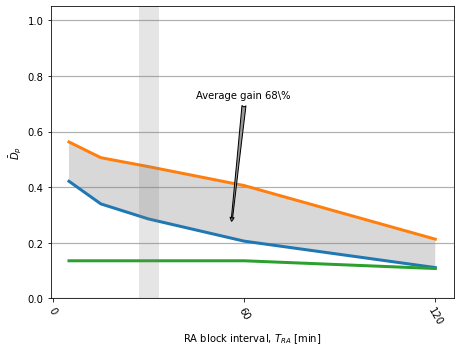

In [22]:
dataset='synthetic'
Plotter_csv_fill_b(benc_pd_p,us_pd_p,typess='p',exp_type='Tadm',dataset=dataset)
# savefigs_all_formats(Filesave,'Synthetic_T_adm_Plot_P_Benchmark_squared_v2')

### COST

# Real World Analysis

### Ctot analysis


In [15]:
benc_pd_p=pd.read_csv('/home/jupyter-sergi/data/KaNSaaS_IINFOCOM_2023/GITHUB/data/Results/Figs/FINAL_PAPER/26_02_2023/csv/Real_coNEXT_Ctot_exp_T_adm_x_y_data_p.csv',index_col=0)
us_pd_p=pd.read_csv('/home/jupyter-sergi/data/KaNSaaS_IINFOCOM_2023/GITHUB/data/Results/Figs/FINAL_PAPER/26_02_2023/csv/Real_KaNSaaS_Ctot_exp_T_adm_x_y_data_p.csv',index_col=0)




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


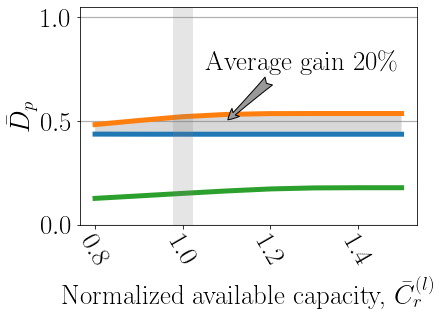

In [16]:

dataset='real'
Plotter_csv_fill_b(benc_pd_p,us_pd_p,typess='p',exp_type='C_tot',dataset=dataset)
savefigs_all_formats(Filesave,'Real_Ctot_p_benchmark_squared_v2')

### Q Analysis

In [ ]:
### Real Traffic ####

benc_pd_p=pd.read_csv('/home/jupyter-sergi/data/KaNSaaS_IINFOCOM_2023/Data/Results/Figs/FINAL_PAPER/23_07_2022/csv/Q_x_y_data_p.csv',index_col=0)
us_pd_p=pd.read_csv('/home/jupyter-sergi/data/KaNSaaS_IINFOCOM_2023/Data/Results/Figs/FINAL_PAPER/23_07_2022/csv/US_Q_x_y_data_p.csv',index_col=0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


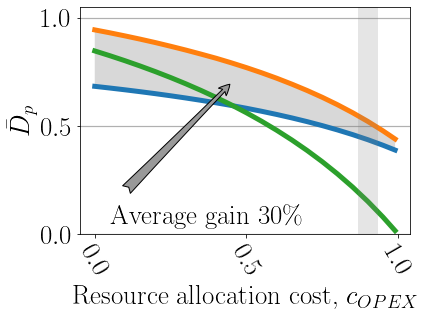

In [ ]:
dataset='real'
Plotter_csv_fill_b(benc_pd_p,us_pd_p,typess='p',exp_type='Q',dataset=dataset)
savefigs_all_formats(Filesave,'Real_Q_Plot_P_Benchmark_squared_v2')

### T_adm Analysis

In [ ]:
benc_pd_p=pd.read_csv('/home/jupyter-sergi/data/KaNSaaS_IINFOCOM_2023/Data/Results/Figs/FINAL_PAPER/24_07_2022/csv/T_adm_x_y_data_p.csv',index_col=0)
us_pd_p=pd.read_csv('/home/jupyter-sergi/data/KaNSaaS_IINFOCOM_2023/Data/Results/Figs/FINAL_PAPER/24_07_2022/csv/US_T_adm_x_y_data_p.csv',index_col=0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


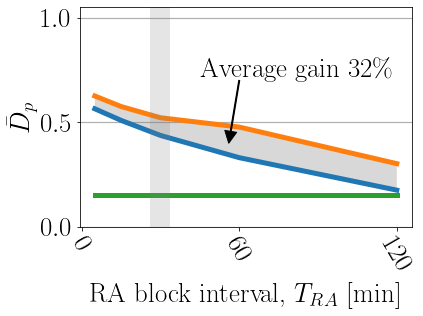

In [ ]:
dataset='real'
Plotter_csv_fill_b(benc_pd_p,us_pd_p,typess='p',exp_type='Tadm',dataset=dataset)
savefigs_all_formats(Filesave,'Real_T_adm_Plot_P_Benchmark_squared_v2')
